# Capstone Project - Predicting Accident severity in Seattle, Washington
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Cleaning and Visualization](#CleanViz)
* [Model](#model)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

The objective of this project is pro predict the severity of accidents in Seattle, Washington. Predicting the severity of an accident could help save lives and properties.

In addition, predicting the severity of an accident also helps first responders dispatch the right personnel to the accident scene.

There are 2 categorical classes of prediction for this project. These are:
Injury Collision - Class 1
Property Damage Only Collision - Class 2

## Data <a name="data"></a>

The data used was provided by the instructor of this course. To predict the severity of an accident in this project, we will be using the following columns in the data provided:
* weather condition
* light condition
* road condition

### import necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE

In [3]:
#import xgboost
from sklearn.model_selection import train_test_split

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

#### read the csv file using pandas

In [5]:
# Read Data from CSV
pd_collision=pd.read_csv('Data-Collisions.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
# print the first 5 columns of the data
pd_collision.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [7]:
pd_collision.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [8]:
pd_collision.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [9]:
# number of rows and columns
pd_collision.shape

(194673, 38)

In [10]:
# Count the number of null inputs in the columns
pd_collision.isnull().sum(axis=0)

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [11]:
pd_collision.groupby(by=["SEVERITYCODE"]).sum()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,,,,,,,,,,,,,,,
1,-1.617469e+07,6.296217e+06,14693412341,19086510801,19114016487,1.388175e+09,136485,317921,719,679,265233,1777110,6.486308e+11,5956749,207489439
2,-6.987248e+06,2.720020e+06,6424591068,8380186281,8393047021,1.055754e+09,116376,157943,6511,4848,108691,922570,2.676989e+11,46488374,1696889835


### Print the Categorical Columns

In [12]:
cat_col =pd_collision.select_dtypes(include='object').columns.values.tolist()
cat_col

['REPORTNO',
 'STATUS',
 'ADDRTYPE',
 'LOCATION',
 'EXCEPTRSNCODE',
 'EXCEPTRSNDESC',
 'SEVERITYDESC',
 'COLLISIONTYPE',
 'INCDATE',
 'INCDTTM',
 'JUNCTIONTYPE',
 'SDOT_COLDESC',
 'INATTENTIONIND',
 'UNDERINFL',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'PEDROWNOTGRNT',
 'SPEEDING',
 'ST_COLCODE',
 'ST_COLDESC',
 'HITPARKEDCAR']

## Data Cleaning & Visualizations  <a name="CleanViz"></a>

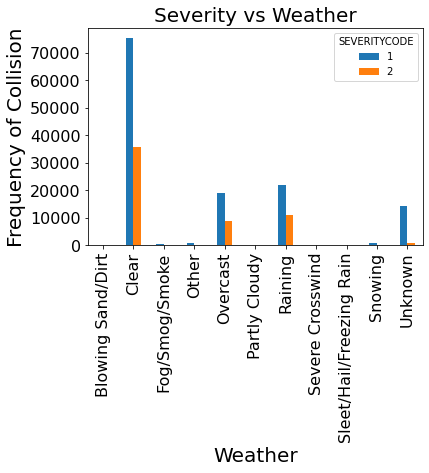

In [13]:
%matplotlib inline
pd.crosstab(pd_collision.WEATHER,pd_collision.SEVERITYCODE).plot(kind='bar', fontsize=16)
plt.title('Severity vs Weather',fontsize=20)
plt.xlabel('Weather',fontsize=20)
plt.ylabel('Frequency of Collision',fontsize=20)
fig = plt.gcf()
fig.set_size_inches(6, 4)

#plt.savefig('purchase_fre_job')

(0.0, 10.0)

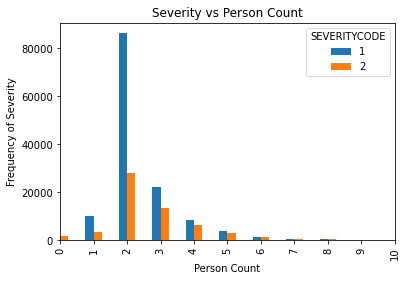

In [14]:
pd.crosstab(pd_collision.PERSONCOUNT,pd_collision.SEVERITYCODE).plot(kind='bar')
plt.title('Severity vs Person Count')
plt.xlabel('Person Count')
plt.ylabel('Frequency of Severity')
plt.xlim(0,10)
#plt.savefig('purchase_fre_job')

(0.0, 10.0)

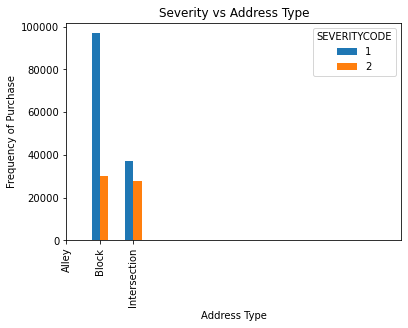

In [15]:
pd.crosstab(pd_collision.ADDRTYPE,pd_collision.SEVERITYCODE).plot(kind='bar')
plt.title('Severity vs Address Type')
plt.xlabel('Address Type')
plt.ylabel('Frequency of Purchase')
plt.xlim(0,10)
#plt.savefig('purchase_fre_job')

(0.0, 10.0)

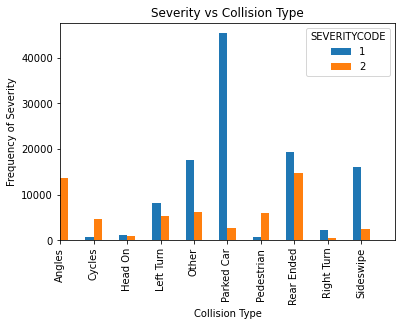

In [16]:
pd.crosstab(pd_collision.COLLISIONTYPE,pd_collision.SEVERITYCODE).plot(kind='bar')
plt.title('Severity vs Collision Type')
plt.xlabel('Collision Type')
plt.ylabel('Frequency of Severity')
plt.xlim(0,10)
#plt.savefig('purchase_fre_job')

(0.0, 10.0)

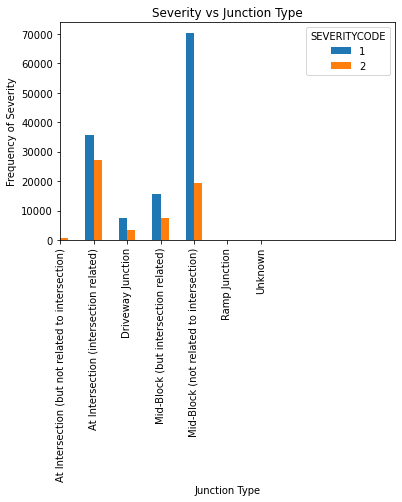

In [17]:
pd.crosstab(pd_collision.JUNCTIONTYPE,pd_collision.SEVERITYCODE).plot(kind='bar')
plt.title('Severity vs Junction Type')
plt.xlabel('Junction Type')
plt.ylabel('Frequency of Severity')
plt.xlim(0,10)
#plt.savefig('purchase_fre_job')

(0.0, 10.0)

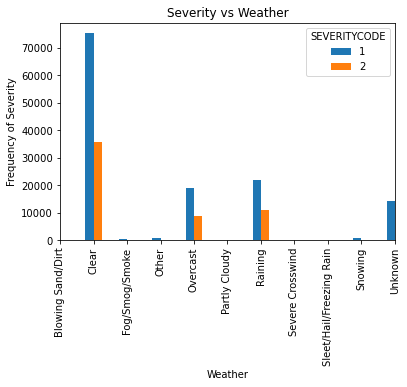

In [18]:
pd.crosstab(pd_collision.WEATHER,pd_collision.SEVERITYCODE).plot(kind='bar')
plt.title('Severity vs Weather')
plt.xlabel('Weather')
plt.ylabel('Frequency of Severity')
plt.xlim(0,10)
#plt.savefig('purchase_fre_job')

(0.0, 10.0)

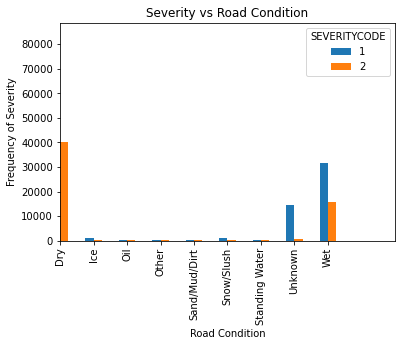

In [19]:
pd.crosstab(pd_collision.ROADCOND,pd_collision.SEVERITYCODE).plot(kind='bar')
plt.title('Severity vs Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Frequency of Severity')
plt.xlim(0,10)
#plt.savefig('purchase_fre_job')

(0.0, 10.0)

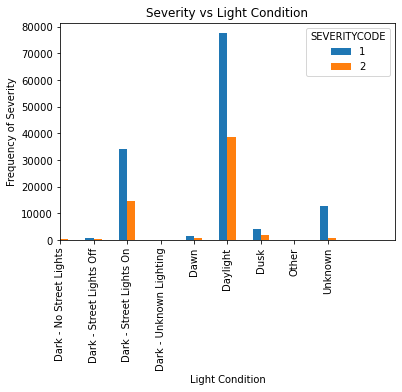

In [20]:
pd.crosstab(pd_collision.LIGHTCOND,pd_collision.SEVERITYCODE).plot(kind='bar')
plt.title('Severity vs Light Condition')
plt.xlabel('Light Condition')
plt.ylabel('Frequency of Severity')
plt.xlim(0,10)
#plt.savefig('purchase_fre_job')

## Check for Categories in Data columns

## Feature Selection

In [21]:
#selection = ['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND']
selection = ['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']

In [22]:
sel_columns = pd_collision[selection]
sel_columns

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
...,...,...,...,...
194668,2,Clear,Dry,Daylight
194669,1,Raining,Wet,Daylight
194670,2,Clear,Dry,Daylight
194671,2,Clear,Dry,Dusk


In [51]:
sel_col_dropna = sel_columns.dropna(inplace = False)

In [52]:
X = sel_col_dropna[['WEATHER','ROADCOND','LIGHTCOND']]
y=sel_col_dropna['SEVERITYCODE']

In [53]:
X

,WEATHER,ROADCOND,LIGHTCOND
0,Overcast,Wet,Daylight
1,Raining,Wet,Dark - Street Lights On
2,Overcast,Dry,Daylight
3,Clear,Dry,Daylight
4,Raining,Wet,Daylight
...,...,...,...
194668,Clear,Dry,Daylight
194669,Raining,Wet,Daylight
194670,Clear,Dry,Daylight
194671,Clear,Dry,Dusk


In [26]:
for distinct_cat in sel_columns.columns.tolist():
    print('***************************',distinct_cat,'*****************************')
    print(sel_columns[distinct_cat].unique())
    print(sel_columns[distinct_cat].value_counts())

*************************** SEVERITYCODE *****************************
[2 1]
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64
*************************** WEATHER *****************************
['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt'
 'Severe Crosswind' 'Partly Cloudy']
Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
*************************** ROADCOND *****************************
['Wet' 'Dry' nan 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']
Dry               124510
Wet                47474
Unknown    

In [27]:
for distinct_dropna in sel_col_dropna.columns.tolist():
    print('***************************',distinct_dropna,'*****************************')
    print(sel_col_dropna[distinct_dropna].unique())
    print(sel_col_dropna[distinct_dropna].value_counts())

*************************** SEVERITYCODE *****************************
[2 1]
1    132285
2     57052
Name: SEVERITYCODE, dtype: int64
*************************** WEATHER *****************************
['Overcast' 'Raining' 'Clear' 'Unknown' 'Other' 'Snowing' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy']
Clear                       111008
Raining                      33117
Overcast                     27681
Unknown                      15039
Snowing                        901
Other                          824
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               55
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
*************************** ROADCOND *****************************
['Wet' 'Dry' 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']
Dry               124300
Wet                47417
Unknown            

#### Percentage of Missing values dropped from the data

In [28]:

print('Percentage of data dropped' ,(sel_columns.shape[0]-sel_col_dropna.shape[0])/sel_columns.shape[0]*100,'%')


Percentage of data dropped 2.741006713822667 %


## Modeling

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
pd_collision['SEVERITYCODE'].values.reshape(1,-1)

array([[2, 1, 1, ..., 2, 2, 1]], dtype=int64)

In [31]:
#enc_sev = OneHotEncoder().fit_transform(pd_collision['SEVERITYCODE'].values.reshape(1,-1))

## Encoding Categorical Data

In [32]:
X_enc = pd.get_dummies(X,drop_first=True)

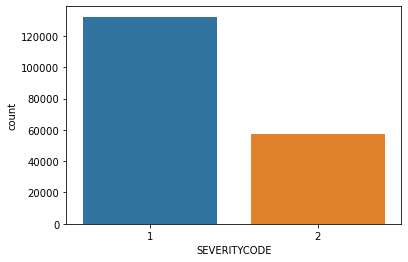

In [33]:
sns.countplot(y,label="Sum")
plt.show()

#### Resampling Data using imblearn

In [34]:
# transform the dataset
oversample = SMOTE()
X_enc, y = oversample.fit_resample(X_enc, y)
# summarize the new class distribution

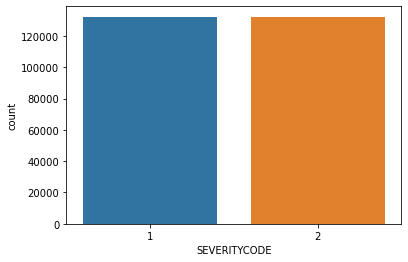

In [35]:
sns.countplot(y,label="Sum")
plt.show()


# Model  <a name="model"></a>


The following models were used to predict the accident severity for comparisons:
- Decision Tree
- Logistic Regression
- Naive Bayes
- Linear Discriminat
- K Nearest Neighbor(KNN)






In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_enc,y,test_size=0.3,random_state=42)

## Decision Tree

In [37]:
decision_tree = DecisionTreeClassifier()

In [38]:


scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [39]:
print('fit_time', dtree_fit_time)
print('score_time', dtree_score_time)
print('Accuracy', dtree_accuracy)
print('Precision', dtree_precision)
print('Recall',  dtree_recall)
print('f1', dtree_f1)
print('ROC', dtree_roc)

fit_time 0.34520740509033204
score_time 0.07376117706298828
Accuracy 0.5619792989200514
Precision 0.583587818821391
Recall 0.5617381390295562
f1 0.5313693288981433
ROC 0.5772324099381304


#### Fit and Predict model

In [40]:
clf_tree = DecisionTreeClassifier(criterion="entropy")
clf_tree = clf_tree.fit(X_train, y_train)
pred_tree = clf_tree.predict(X_test)

roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
print("F1 Score: ", f1_score(y_test, pred_tree))
print("Precision: ", precision_score(y_test, pred_tree))
print("Recall: ", recall_score(y_test, pred_tree))
print("Accuracy: ", accuracy_score(y_test, pred_tree))

F1 Score:  0.4170936150912969
Precision:  0.628353072173297
Recall:  0.3121464309959017
Accuracy:  0.5628000151188721


In [ ]:
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, predTree))

In [ ]:
from graphviz  import Source
from IPython.display import SVG, display, HTML
from sklearn import tree

In [ ]:
max_depth_options = range(1, 17)
score_info = pd.DataFrame()

In [ ]:
for max_depth in max_depth_options:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth = max_depth)
    clf = clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    store_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})
    score_info = score_info.append(store_score_data)

In [ ]:
score_info.head(10)

In [ ]:
score_info.plot(x = 'max_depth', y = ['train_score', 'test_score'], legend = True)

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
LR = LogisticRegression(C=0.01, solver='liblinear')
LR

LogisticRegression(C=0.01, solver='liblinear')

#### Fit and Predict model

In [43]:
LR = LR.fit(X_train, y_train)
pred_LR = LR.predict(X_test)
print("F1 Score: ", f1_score(y_test, pred_LR))
print("Precision: ", precision_score(y_test, pred_LR))
print("Recall: ", recall_score(y_test, pred_LR))
print("Accuracy: ", accuracy_score(y_test, pred_LR))

F1 Score:  0.4090131300296485
Precision:  0.6269997922293787
Recall:  0.3034973474467604
Accuracy:  0.5605069861788311


In [ ]:
y_LR_pred = LR.predict(X_train)

In [ ]:
print("DecisionTrees's Accuracy: ", accuracy_score(y_train, y_LR_pred))

## Naive Bayes

In [44]:
bayes = GaussianNB()

In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores_NB = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
bayes_fit_time = scores_NB['fit_time'].mean()
bayes_score_time = scores_NB['score_time'].mean()
bayes_accuracy = scores_NB['test_accuracy'].mean()
bayes_precision = scores_NB['test_precision_macro'].mean()
bayes_recall = scores_NB['test_recall_macro'].mean()
bayes_f1 = scores_NB['test_f1_weighted'].mean()
bayes_roc = scores_NB['test_roc_auc'].mean()

In [ ]:
print('bayes_fit_time', bayes_fit_time)
print('bayes_score_time', bayes_score_time)
print('bayes_Accuracy', bayes_accuracy)
print('bayes_Precision', bayes_precision)
print('bayes_Recall',  bayes_recall)
print('bayes_f1', bayes_f1)
print('bayes_ROC', bayes_roc)

#### Fit and Predict model

In [45]:
bayes = bayes.fit(X_train, y_train)
pred_bayes = bayes.predict(X_test)
print("F1 Score: ", f1_score(y_test, pred_bayes))
print("Precision: ", precision_score(y_test, pred_bayes))
print("Recall: ", recall_score(y_test, pred_bayes))
print("Accuracy: ", accuracy_score(y_test, pred_bayes))

F1 Score:  0.6609697764084057
Precision:  0.49961398903728865
Recall:  0.976265305609333
Accuracy:  0.49814163863375793


## Linear Discriminant Analysis

In [46]:
LDA = LinearDiscriminantAnalysis()

In [ ]:
scores_LDA = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=3)

sorted(scores.keys())
LDA_fit_time = scores_LDA['fit_time'].mean()
LDA_score_time = scores_LDA['score_time'].mean()
LDA_accuracy = scores_LDA['test_accuracy'].mean()
LDA_precision = scores_LDA['test_precision_macro'].mean()
LDA_recall = scores_LDA['test_recall_macro'].mean()
LDA_f1 = scores_LDA['test_f1_weighted'].mean()
LDA_roc = scores_LDA['test_roc_auc'].mean()

In [ ]:
print('LDA_fit_time', LDA_fit_time)
print('LDA_score_time', LDA_score_time)
print('LDA_Accuracy', LDA_accuracy)
print('LDA_Precision', LDA_precision)
print('LDA_Recall',  LDA_recall)
print('LDA_f1', LDA_f1)
print('LDA_ROC', LDA_roc)

#### Fit and Predict model

In [48]:
LDA = LDA.fit(X_train, y_train)
pred_LDA = LDA.predict(X_test)

print("F1 Score: ", f1_score(y_test, pred_LDA))
print("Precision: ", precision_score(y_test, pred_LDA))
print("Recall: ", recall_score(y_test, pred_LDA))
print("Accuracy: ", accuracy_score(y_test, pred_LDA))

F1 Score:  0.445482619368121
Precision:  0.6017884648297107
Recall:  0.3536318608100973
Accuracy:  0.5588439102442958


## K-Nearest Neighbors

In [49]:
KNN = KNeighborsClassifier()

In [ ]:
# Took a while to run

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores_knn = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=3)

sorted(scores.keys())
KNN_fit_time = scores_knn['fit_time'].mean()
KNN_score_time = scores_knn['score_time'].mean()
KNN_accuracy = scores_knn['test_accuracy'].mean()
KNN_precision = scores_knn['test_precision_macro'].mean()
KNN_recall = scores_knn['test_recall_macro'].mean()
KNN_f1 = scores_knn['test_f1_weighted'].mean()
KNN_roc = scores_knn['test_roc_auc'].mean()

In [ ]:
print('KNN_fit_time', dtree_fit_time)
print('KNN_score_time', dtree_score_time)
print('KNN_Accuracy', dtree_accuracy)
print('KNN_Precision', dtree_precision)
print('KNN_Recall',  dtree_recall)
print('KNN_f1', dtree_f1)
print('KNN_ROC', dtree_roc)

#### Fit and Predict model

In [50]:
KNN = KNN.fit(X_train, y_train)
pred_KNN = KNN.predict(X_test)

print("F1 Score: ", f1_score(y_test, pred_KNN))
print("Precision: ", precision_score(y_test, pred_KNN))
print("Recall: ", recall_score(y_test, pred_KNN))
print("Accuracy: ", accuracy_score(y_test, pred_KNN))

F1 Score:  0.5971436491883735
Precision:  0.5046508399278079
Recall:  0.7311492721192769
Accuracy:  0.5056506784593869
